In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '.\CleanData\clean_df.csv'
NYCdata = pd.read_csv(filepath)

In [159]:
print(NYCdata.info())
NYCdata.shape

#'SALE PRICE' looks like a good candidate to select as a dependent variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59483 entries, 0 to 59482
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         59483 non-null  int64  
 1   NEIGHBORHOOD                    59483 non-null  object 
 2   BUILDING CLASS CATEGORY         59483 non-null  object 
 3   TAX CLASS AT PRESENT            59404 non-null  object 
 4   BLOCK                           59483 non-null  int64  
 5   LOT                             59483 non-null  int64  
 6   BUILDING CLASS AT PRESENT       59404 non-null  object 
 7   ADDRESS                         59483 non-null  object 
 8   APARTMENT NUMBER                59483 non-null  object 
 9   ZIP CODE                        59483 non-null  float64
 10  RESIDENTIAL UNITS               59483 non-null  float64
 11  COMMERCIAL UNITS                59483 non-null  float64
 12  TOTAL UNITS                     

(59483, 24)

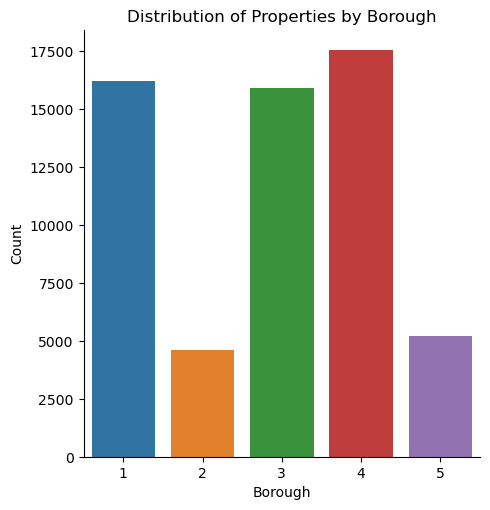

In [160]:
#Categorical Data Analysis

#Plotting borough counts
sns.catplot(data=NYCdata, x='BOROUGH', kind='count')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Distribution of Properties by Borough')
plt.show()

# Recall Borough 1-5 represents Manhattan, Bronx, Brooklyn, Queens, Staten Island
# We can clearly see most of the sales occur in Queens, Manhattan and Brooklyn and very fewer sales in Bronx and Staten Island
# I wonder if this affects price or Square Footage of units?

In [161]:
#Find out how many unique building class categories
bd_category_counts = NYCdata['BUILDING CLASS CATEGORY'].value_counts()
print(bd_category_counts)

#Most common ones are CO-OPS and CONDOS with elevator, followed by Single family homes and two family homes. 

bd_atsale_counts = NYCdata['BUILDING CLASS AT TIME OF SALE'].value_counts()
print(bd_atsale_counts)
bd_atpresent_counts = NYCdata['BUILDING CLASS AT PRESENT'].value_counts()
print(bd_atpresent_counts)

#There are too many building class at Time of Sale or At Present. We need to reduce the subcategories. 


10 COOPS - ELEVATOR APARTMENTS                12373
13 CONDOS - ELEVATOR APARTMENTS               11185
01 ONE FAMILY DWELLINGS                       11026
02 TWO FAMILY DWELLINGS                        8394
09 COOPS - WALKUP APARTMENTS                   2491
03 THREE FAMILY DWELLINGS                      2062
07 RENTALS - WALKUP APARTMENTS                 1722
15 CONDOS - 2-10 UNIT RESIDENTIAL              1357
17 CONDO COOPS                                 1203
44 CONDO PARKING                               1193
04 TAX CLASS 1 CONDOS                          1131
12 CONDOS - WALKUP APARTMENTS                   786
05 TAX CLASS 1 VACANT LAND                      604
22 STORE BUILDINGS                              526
08 RENTALS - ELEVATOR APARTMENTS                391
14 RENTALS - 4-10 UNIT                          389
47 CONDO NON-BUSINESS STORAGE                   383
11 SPECIAL CONDO BILLING LOTS                   314
29 COMMERCIAL GARAGES                           280
43 CONDO OFF

R    18213
D    12764
A    10830
B     7989
C     6275
S      990
V      770
K      526
G      337
O      215
E      184
F      125
Z       78
M       51
H       49
W       29
I       18
P       15
N       13
Q        5
J        5
T        2
Name: New Building Class Category, dtype: int64


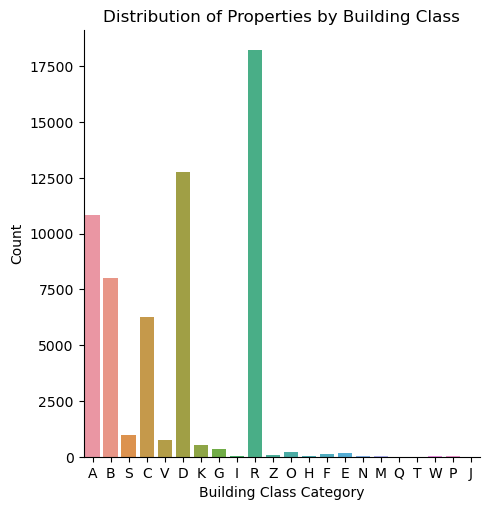

In [162]:
#Creating a new Building Class Category which uses the first letter of BUILDING CLASS AT TIME OF SALE
NYCdata['New Building Class Category'] = NYCdata['BUILDING CLASS AT TIME OF SALE'].str[0]
new_bd_counts = NYCdata['New Building Class Category'].value_counts()
print(new_bd_counts)

#Plotting borough counts
sns.catplot(data=NYCdata, x='New Building Class Category', kind='count')
plt.xlabel('Building Class Category')
plt.ylabel('Count')
plt.title('Distribution of Properties by Building Class')
plt.show()

#This is much better than the previous classification. Building class R = Condos, D = Elevator Apartments, A = One Family Dwellings
# B = Two Family Dwellings, C = Walk Up Apartment. This roughly matches the categorical count we performed earlier. 
# This simplified data makes it easier to identify trends/patterns between variables. 

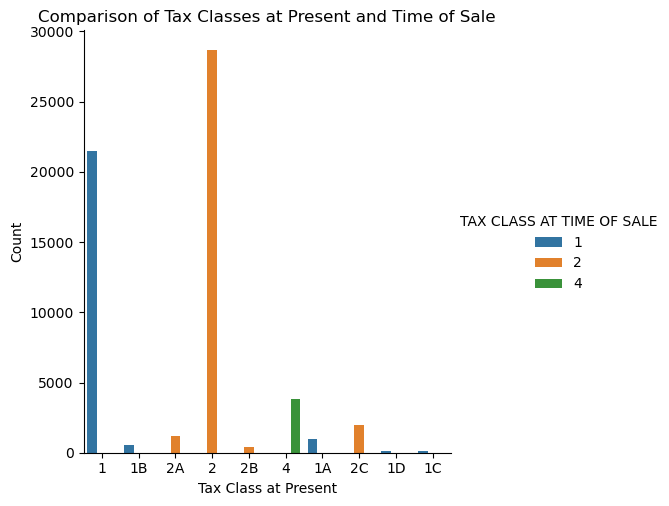

In [163]:
# Looking at another categorical feature: TAX CLASS AT PRESENT vs TAX CLASS AT TIME OF SALE
sns.catplot(data=NYCdata, x='TAX CLASS AT PRESENT', hue='TAX CLASS AT TIME OF SALE', kind='count')
plt.xlabel('Tax Class at Present')
plt.ylabel('Count')
plt.title('Comparison of Tax Classes at Present and Time of Sale')
plt.show()

#Although minor differences, but for later analysis we will use TAX CLASS AT PRESENT instead to account for the little nuances

In [164]:
# Lets take a look at APARTMENT NUMBER to see if there is anything interesting here
apartment_counts = NYCdata['APARTMENT NUMBER'].value_counts()
print(apartment_counts)

#Unfortunately 42747 values are actually 0! Which makes sense since Condos/Single Family dwellings will not have an apartment number
#This raises the question whether this column is even useful in explaining any variance in the target feature (Price)
#We perform a crosstab vs our New Building Class Category to see which building classes get apartment numbers

cross_tab = pd.crosstab(NYCdata['New Building Class Category'], NYCdata['APARTMENT NUMBER'], margins=True)
print(cross_tab)

#The results show that Building Category R has the most non-zero APARTMENT NUMBER values. Furthermore, there is a lack of
#consistency in the nomenclature of APARTMENT NUMBER, offering very little value for further analysis.This is a column that can be dropped.


0       42747
3B        265
2A        265
3A        264
2B        231
        ...  
1710        1
1713        1
2106        1
2302        1
83          1
Name: APARTMENT NUMBER, Length: 3627, dtype: int64
APARTMENT NUMBER                 0  01  02-B    1  1&2  1-1  1-2  1-3  1-4  \
New Building Class Category                                                  
A                            10830   0     0    0    0    0    0    0    0   
B                             7989   0     0    0    0    0    0    0    0   
C                             6275   0     0    0    0    0    0    0    0   
D                            12764   0     0    0    0    0    0    0    0   
E                              184   0     0    0    0    0    0    0    0   
F                              125   0     0    0    0    0    0    0    0   
G                              337   0     0    0    0    0    0    0    0   
H                               49   0     0    0    0    0    0    0    0   
I              

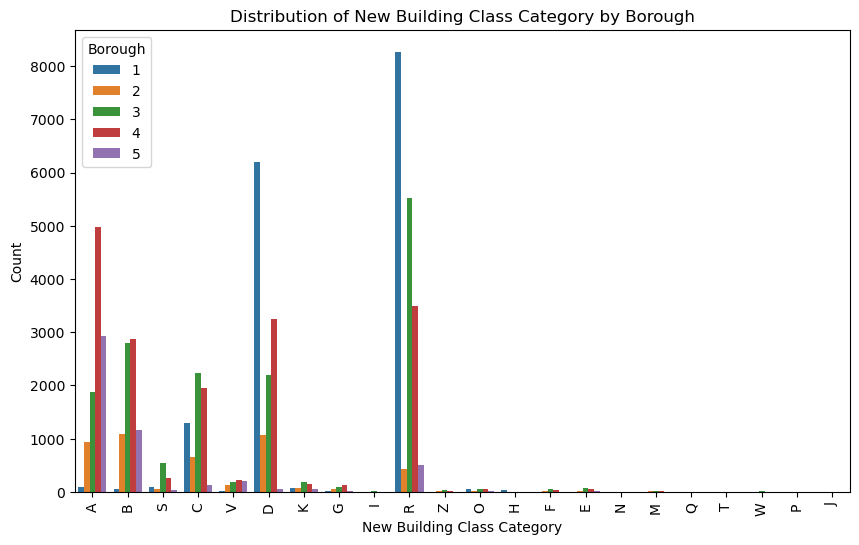

In [166]:
#Let's look at the breakdown of Building Class types by Borough.

plt.figure(figsize=(10, 6))
sns.countplot(x='New Building Class Category', hue='BOROUGH', data=NYCdata)
plt.xlabel('New Building Class Category')
plt.ylabel('Count')
plt.title('Distribution of New Building Class Category by Borough')
plt.legend(title='Borough')
plt.xticks(rotation=90)
plt.show()

#For example. Most class R buildings are in Manhattan, followed by Brooklyn and Queens. With very few in Brooklyn and Staten Island
#Whereas most single family dwellings are in Queens, Staten Island and Brooklyn with almost none in Manhattan! 

<Figure size 1000x600 with 0 Axes>

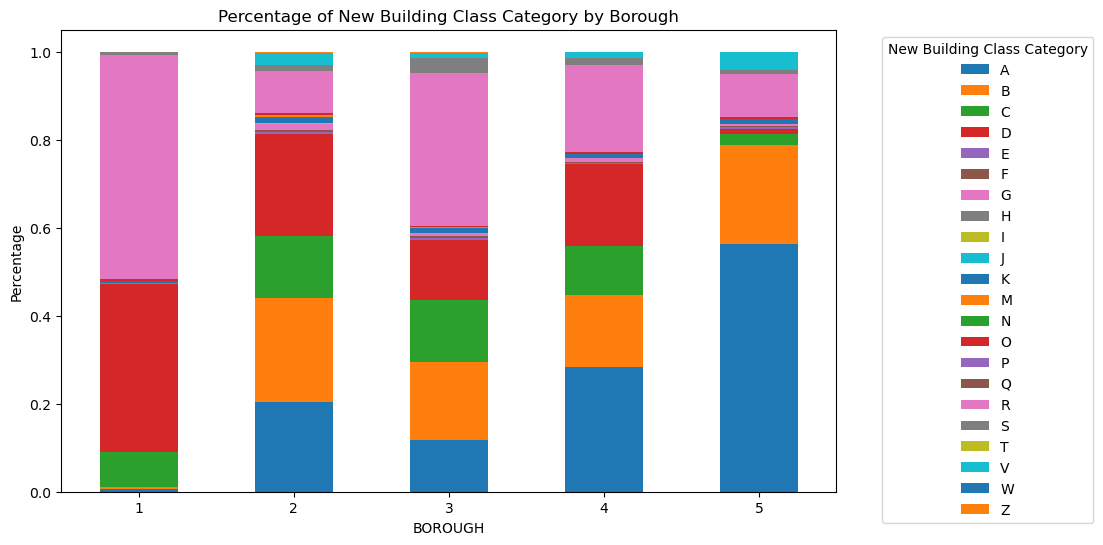

In [167]:
#A better plot would be to find out the distribution of building class types within each Borough.

plt.figure(figsize=(10, 6))
# Calculate the percentage within each group
total_counts = NYCdata['BOROUGH'].value_counts()
grouped_counts = NYCdata.groupby(['BOROUGH', 'New Building Class Category']).size().unstack().div(total_counts, axis=0)
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('BOROUGH')
plt.ylabel('Percentage')
plt.title('Percentage of New Building Class Category by Borough')
plt.legend(title='New Building Class Category',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#Here, we noticed Manhattan is concentrated with type R and type D and Queens and Bronx have a good diverse set of building classes.

<Figure size 1000x600 with 0 Axes>

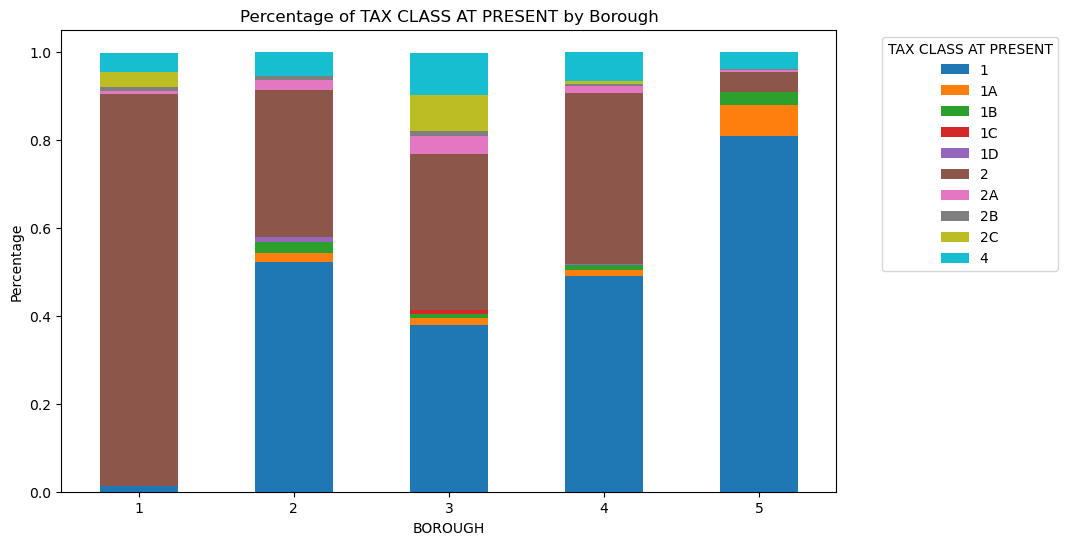

In [168]:
#Now we repeat the same above but for TAX CLASS AT TIME OF SALE.
plt.figure(figsize=(10, 6))
# Calculate the percentage within each group
total_counts = NYCdata['BOROUGH'].value_counts()
grouped_counts = NYCdata.groupby(['BOROUGH', 'TAX CLASS AT PRESENT']).size().unstack().div(total_counts, axis=0)
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('BOROUGH')
plt.ylabel('Percentage')
plt.title('Percentage of TAX CLASS AT PRESENT by Borough')
plt.legend(title='TAX CLASS AT PRESENT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#We see a concentration of TAX CLASS 2 in Manhattan and tax class 1 in Staten Island.
#THe high building class and tax class concentrations in Manhattan might be a very unique phenomenon and we will look at it
#in detail quantitative factors.

In [169]:
address_counts = NYCdata['ADDRESS'].value_counts()
print(address_counts)


N/A COLE STREET           11
32-46 48TH STREET         10
N/A ALMEDA AVENUE          8
1402 YORK AVENUE, 1        7
2 HORATIO STREET, RES1     6
                          ..
184 KENT AVENUE, B304      1
184 KENT AVE, B308         1
184 KENT AVENUE, B311      1
184 KENT AVENUE, B315      1
3120 ARTHUR KILL ROAD      1
Name: ADDRESS, Length: 58782, dtype: int64


In [147]:
'''from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-app")

# Create a new column called "COORDINATES"
NYCdata['COORDINATES'] = NYCdata['NEW ADDRESS'].apply(lambda address: geolocator.geocode(address))

# Extract latitude and longitude from the geocode results
#NYCdata['LATITUDE'] = NYCdata['COORDINATES'].apply(lambda location: location.latitude if location else None)
#NYCdata['LONGITUDE'] = NYCdata['COORDINATES'].apply(lambda location: location.longitude if location else None)'''


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=469+EAST+185+STREET%2C+New+York+City%2C+New+York%2C+United+States&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [185]:
neighborhood_counts = NYCdata['NEIGHBORHOOD'].value_counts()
print(neighborhood_counts.iloc[:50])
top_10_neighborhoods = NYCdata['NEIGHBORHOOD'].value_counts().nlargest(10).index


FLUSHING-NORTH               2233
UPPER EAST SIDE (59-79)      1746
UPPER EAST SIDE (79-96)      1419
UPPER WEST SIDE (59-79)      1391
MIDTOWN EAST                  995
BEDFORD STUYVESANT            853
CHELSEA                       848
UPPER WEST SIDE (79-96)       812
BAYSIDE                       807
LONG ISLAND CITY              800
BOROUGH PARK                  797
FOREST HILLS                  788
ASTORIA                       770
JACKSON HEIGHTS               766
MURRAY HILL                   705
HARLEM-CENTRAL                700
BAY RIDGE                     686
PARK SLOPE                    667
FLUSHING-SOUTH                592
RIVERDALE                     590
MIDTOWN WEST                  579
ELMHURST                      559
GREENWICH VILLAGE-WEST        546
CROWN HEIGHTS                 544
GRAMERCY                      529
REGO PARK                     523
SHEEPSHEAD BAY                513
GREENWICH VILLAGE-CENTRAL     510
GREAT KILLS                   500
OCEAN PARKWAY-

In [87]:
'''Here we take a break from categorical features and look more closely at the quantitative columns and see what we can discover
'''

'Here we take a break from categorical features and look more closely at the quantitative columns and see what we can discover\n'

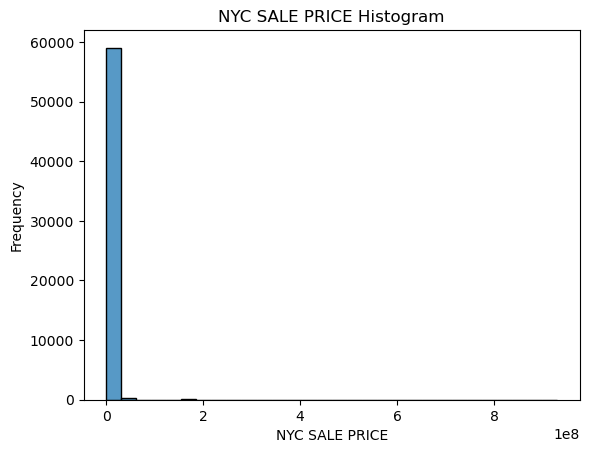

In [171]:
# Making a histogram of the SALE PRICE variable.
sns.histplot(NYCdata['SALE PRICE'], bins=30)
plt.xlabel('NYC SALE PRICE')
plt.ylabel('Frequency')
plt.title('NYC SALE PRICE Histogram')

plt.show()

#A problem we have here is there are a few very high SALE price units that skew the data and make it extremely hard to perform linear analysis

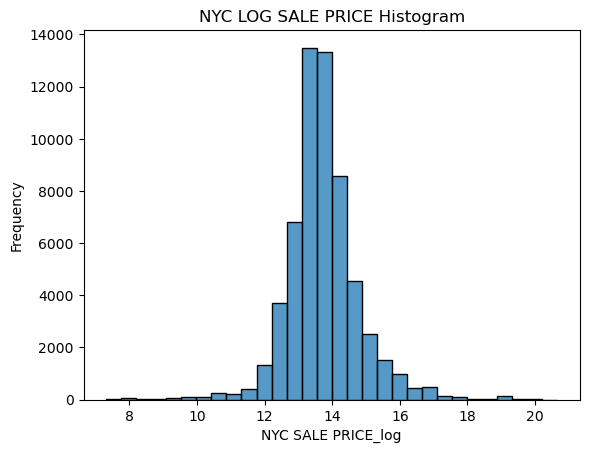

count    59483.000000
mean        13.719330
std          1.076036
min          7.313887
25%         13.171155
50%         13.629182
75%         14.187075
max         20.650695
Name: SALE PRICE_log, dtype: float64


In [172]:
# Making a histogram of the SALE PRICE variable.
sns.histplot(NYCdata['SALE PRICE_log'], bins=30)
plt.xlabel('NYC SALE PRICE_log')
plt.ylabel('Frequency')
plt.title('NYC LOG SALE PRICE Histogram')

plt.show()

print(NYCdata['SALE PRICE_log'].describe())


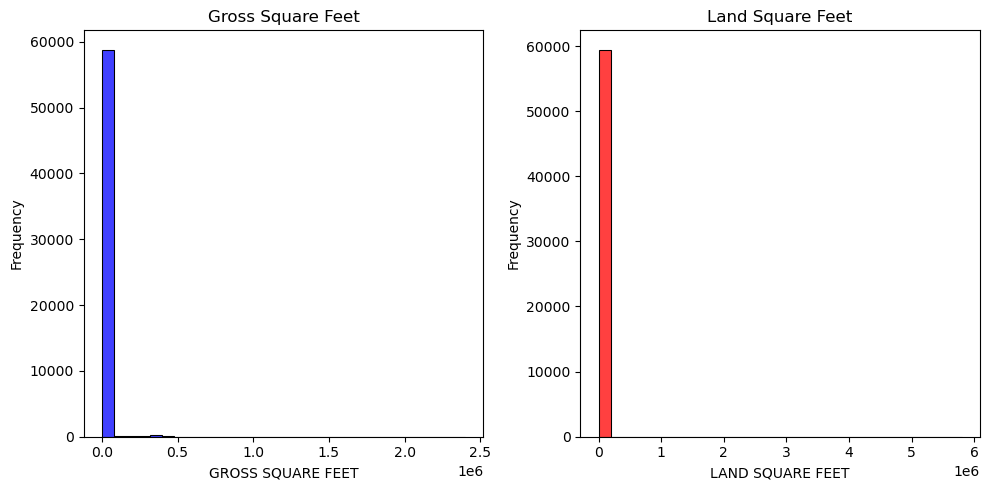

In [173]:
# Making a subplot of the LAND/GROSS SQUARE FEET variable.
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram 1
sns.histplot(data=NYCdata, x='GROSS SQUARE FEET', color='blue', ax=axes[0], bins=30)
axes[0].set_xlabel('GROSS SQUARE FEET')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Gross Square Feet')

# Plot histogram 2
sns.histplot(data=NYCdata, x='LAND SQUARE FEET', color='red', ax=axes[1], bins=30)
axes[1].set_xlabel('LAND SQUARE FEET')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Land Square Feet')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



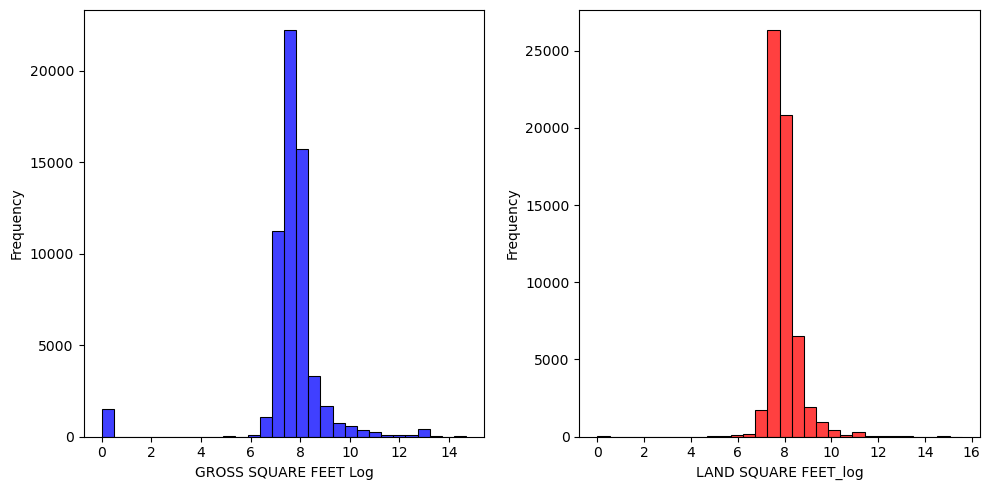

In [174]:
# Making a subplot of the LAND/GROSS SQUARE FEET variable.
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram 1
sns.histplot(data=NYCdata, x='GROSS SQUARE FEET_log', color='blue', ax=axes[0], bins=30)
axes[0].set_xlabel('GROSS SQUARE FEET Log')
axes[0].set_ylabel('Frequency')


# Plot histogram 2
sns.histplot(data=NYCdata, x='LAND SQUARE FEET_log', color='red', ax=axes[1], bins=30)
axes[1].set_xlabel('LAND SQUARE FEET_log')
axes[1].set_ylabel('Frequency')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [175]:
print(NYCdata['LAND SQUARE FEET_log'].describe())
print(NYCdata['GROSS SQUARE FEET_log'].describe())

#Replace 0's with median of Boroughs

# Calculate the medians by grouping the DataFrame by 'BOROUGH' and calculating the median for each column
medians = NYCdata.groupby('BOROUGH')[['LAND SQUARE FEET_log', 'GROSS SQUARE FEET_log', 'TOTAL UNITS']].median()

# Replace zero values with NaN in the respective columns
NYCdata['LAND SQUARE FEET_log'] = NYCdata['LAND SQUARE FEET_log'].replace(0, np.nan)
NYCdata['GROSS SQUARE FEET_log'] = NYCdata['GROSS SQUARE FEET_log'].replace(0, np.nan)
NYCdata['TOTAL UNITS'] = NYCdata['TOTAL UNITS'].replace(0, np.nan)

# Fill NaN values with medians grouped by 'BOROUGH'
NYCdata['LAND SQUARE FEET_log'] = NYCdata.groupby('BOROUGH')['LAND SQUARE FEET_log'].transform(lambda x: x.fillna(x.median()))
NYCdata['GROSS SQUARE FEET_log'] = NYCdata.groupby('BOROUGH')['GROSS SQUARE FEET_log'].transform(lambda x: x.fillna(x.median()))
NYCdata['TOTAL UNITS'] = NYCdata.groupby('BOROUGH')['TOTAL UNITS'].transform(lambda x: x.fillna(x.median()))




count    59483.000000
mean         7.940078
std          0.633075
min          0.000000
25%          7.601402
50%          7.821242
75%          8.188967
max         15.573305
Name: LAND SQUARE FEET_log, dtype: float64
count    59483.000000
mean         7.647867
std          1.478324
min          0.000000
25%          7.378384
50%          7.707962
75%          8.021256
max         14.690980
Name: GROSS SQUARE FEET_log, dtype: float64


In [176]:
# This looks much better, we will create a new DF with the dropped columns
NYCdata.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE PRICE_log,LAND SQUARE FEET_log,GROSS SQUARE FEET_log
BOROUGH,1.000000,0.445312,-0.245286,0.676414,-0.036665,-0.018239,-0.043818,0.002009,-0.076568,0.064825,-0.297887,-0.062627,-0.248082,0.091739,-0.242625
BLOCK,0.445312,1.000000,-0.241665,0.547970,-0.059685,-0.017172,-0.063633,0.006681,-0.084277,-0.051872,-0.288779,-0.086233,-0.240862,0.068736,-0.256515
LOT,-0.245286,-0.241665,1.000000,-0.176689,0.007539,-0.010343,0.000627,0.004224,0.119014,0.402055,0.301286,0.068567,0.126628,0.032811,0.151495
ZIP CODE,0.676414,0.547970,-0.176689,1.000000,-0.004883,-0.011188,-0.010002,0.004117,-0.042969,-0.051378,-0.143357,-0.052352,-0.169599,0.015489,-0.130944
RESIDENTIAL UNITS,-0.036665,-0.059685,0.007539,-0.004883,1.000000,0.013607,0.992358,0.034326,0.523969,0.072408,0.009542,0.143028,0.083866,0.227653,0.422850
COMMERCIAL UNITS,-0.018239,-0.017172,-0.010343,-0.011188,0.013607,1.000000,0.135087,0.024295,0.072563,-0.007170,0.125378,0.083152,0.072053,0.069156,0.118300
TOTAL UNITS,-0.043818,-0.063633,0.000627,-0.010002,0.992358,0.135087,1.000000,0.037105,0.528018,0.068760,0.029130,0.150968,0.086579,0.233069,0.433942
LAND SQUARE FEET,0.002009,0.006681,0.004224,0.004117,0.034326,0.024295,0.037105,1.000000,0.579447,0.013344,0.037837,0.011498,0.006879,0.282764,0.158881
GROSS SQUARE FEET,-0.076568,-0.084277,0.119014,-0.042969,0.523969,0.072563,0.528018,0.579447,1.000000,0.068584,0.072261,0.113448,0.060689,0.379127,0.597842
YEAR BUILT,0.064825,-0.051872,0.402055,-0.051378,0.072408,-0.007170,0.068760,0.013344,0.068584,1.000000,0.217892,0.063703,0.023674,0.063611,0.056605


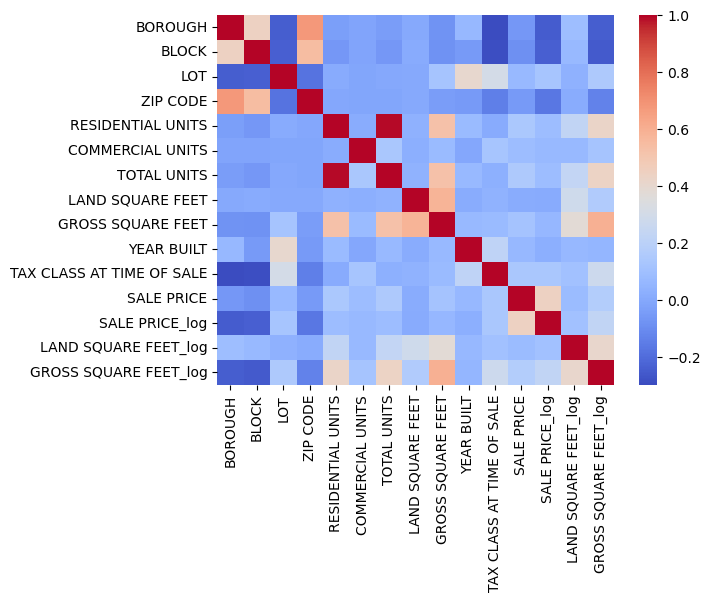

In [177]:

#Heatmap of the correlations of columns
sns.heatmap(NYCdata.corr(), cmap='coolwarm')
plt.show()

#Borough, Block, Zipcode has higher correlation. Year Built and Lot also have higher correlation. Apart from those columns there arent any obvious relationships
#Residential Units and Total Units seem to be highly correlated as well, maybe we can eliminate one.

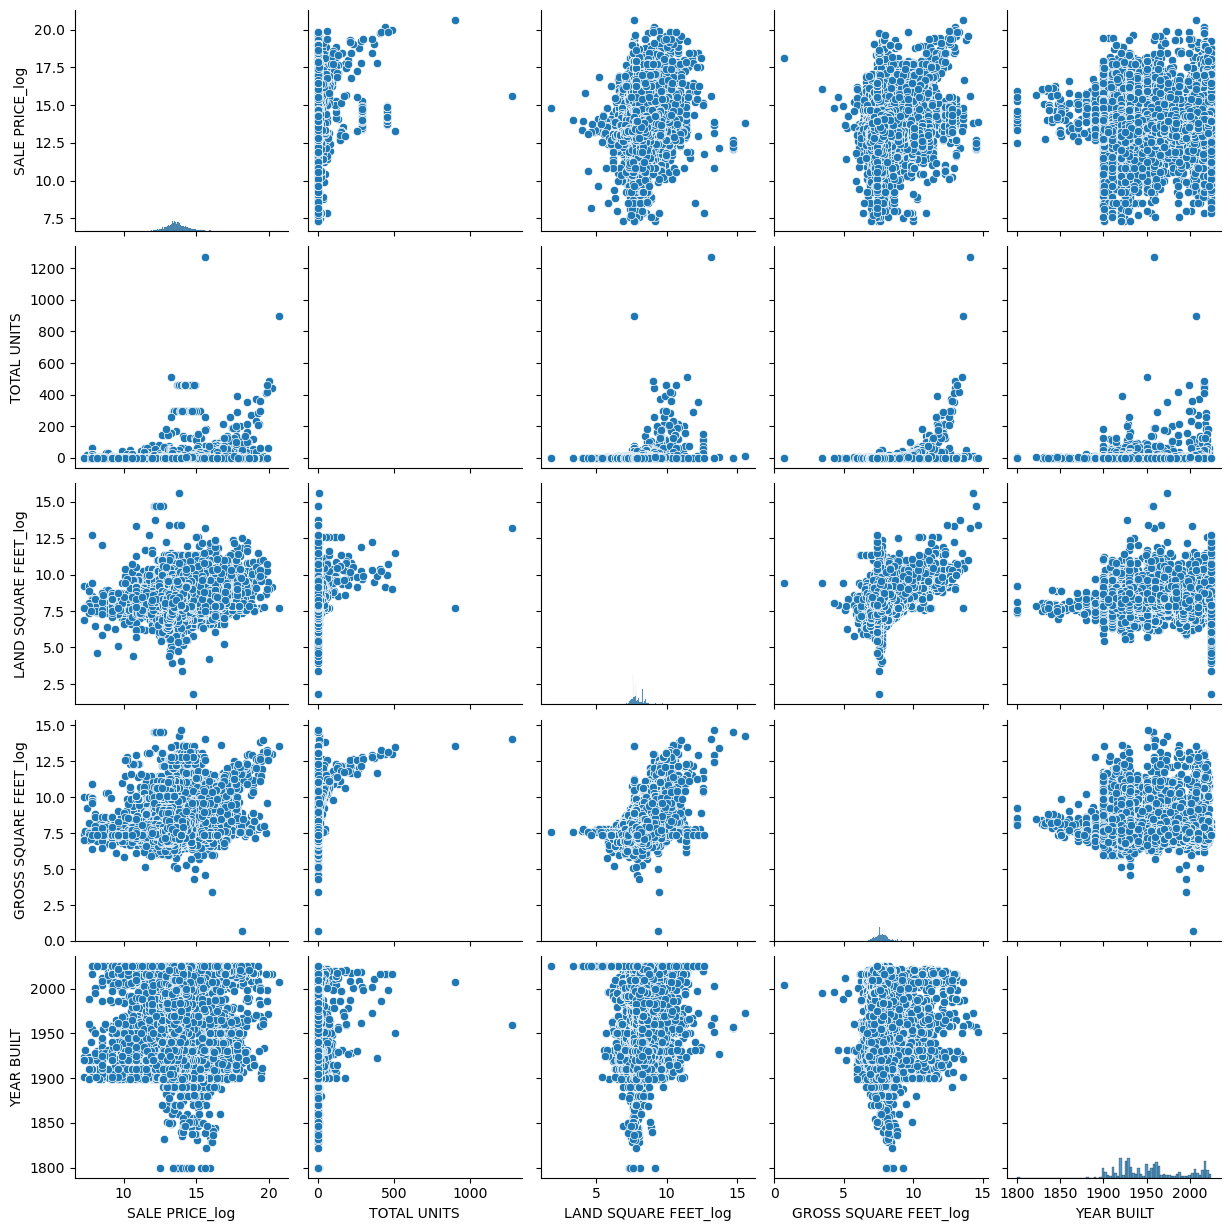

In [178]:
#Create pairplots for selective quantitative columns

# Select the columns for the pair plot
columns = ['SALE PRICE_log', 'TOTAL UNITS', 'LAND SQUARE FEET_log', 'GROSS SQUARE FEET_log', 'YEAR BUILT']

# Create the pair plot
sns.pairplot(NYCdata[columns])

# Display the plot
plt.show()


#We dont see any obvious correlations between sale price and area, athough we suspected there might be some.
#There seems to be some positive correlation between TOTAL UNITS and GROSS SQUARE FEET, which makes sense.

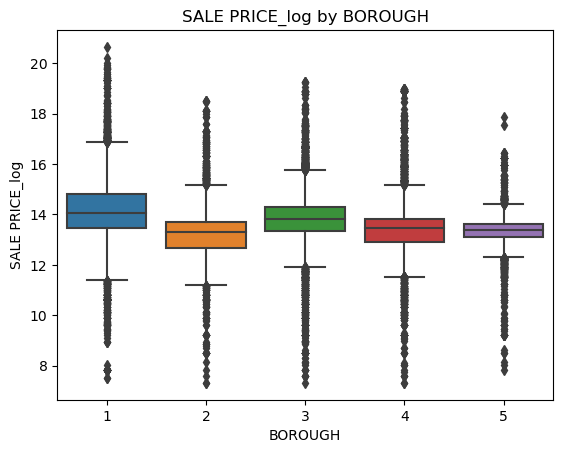

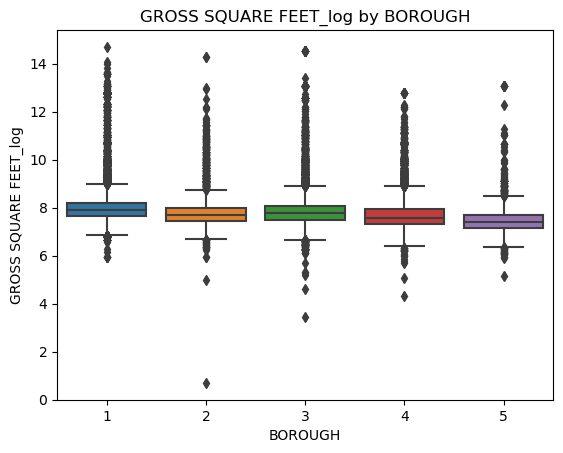

In [179]:
#Combining both categorical and quantitative columns now:

# Plotting SALE PRICE_log grouped by BOROUGH
sns.boxplot(x='BOROUGH', y='SALE PRICE_log', data=NYCdata)
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE_log')
plt.title('SALE PRICE_log by BOROUGH')
plt.show()

# Plotting GROSS SQUARE FEET_log grouped by BOROUGH
sns.boxplot(x='BOROUGH', y='GROSS SQUARE FEET_log', data=NYCdata)
plt.xlabel('BOROUGH')
plt.ylabel('GROSS SQUARE FEET_log')
plt.title('GROSS SQUARE FEET_log by BOROUGH')
plt.show()



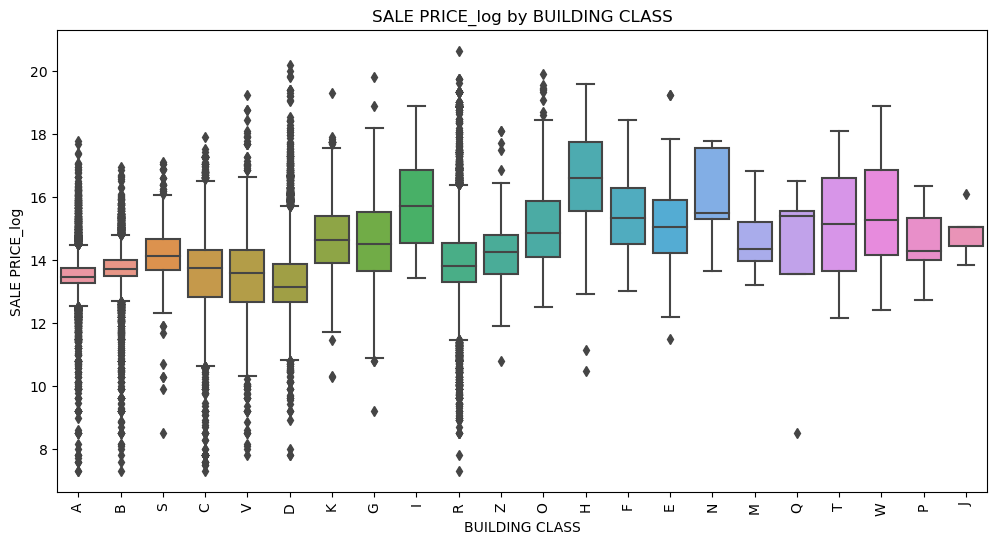

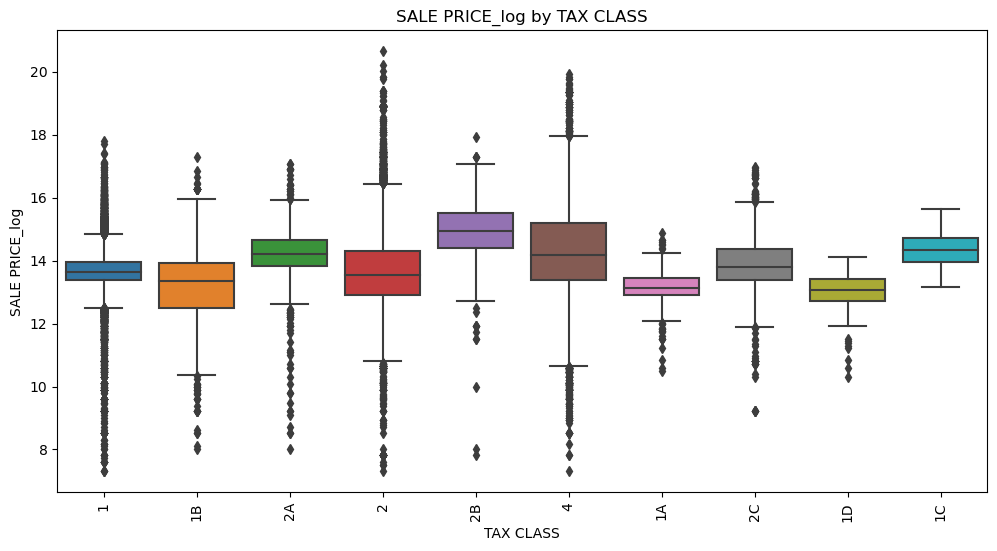

In [180]:
#Repeat for SALE PRICE vs BUILDING CLASS and SALE PRICE vs TAX CLASS

# Plotting SALE PRICE_log vs BUILDING CLASS
plt.figure(figsize=(12, 6))
sns.boxplot(x='New Building Class Category', y='SALE PRICE_log', data=NYCdata)
plt.xlabel('BUILDING CLASS')
plt.ylabel('SALE PRICE_log')
plt.title('SALE PRICE_log by BUILDING CLASS')
plt.xticks(rotation=90)
plt.show()

# Plotting SALE PRICE_log vs TAX CLASS AT PRESENT
plt.figure(figsize=(12, 6))
sns.boxplot(x='TAX CLASS AT PRESENT', y='SALE PRICE_log', data=NYCdata)
plt.xlabel('TAX CLASS')
plt.ylabel('SALE PRICE_log')
plt.title('SALE PRICE_log by TAX CLASS')
plt.xticks(rotation=90)
plt.show()



In [181]:
neighborhood_summary = NYCdata.groupby('NEIGHBORHOOD')['SALE PRICE_log'].agg(['mean', 'median', 'max', 'min'])
print(neighborhood_summary)

                         mean     median        max        min
NEIGHBORHOOD                                                  
AIRPORT LA GUARDIA  13.314045  13.482211  13.669555  12.721889
ALPHABET CITY       13.810508  13.670486  17.974394   9.995155
ANNADALE            13.505821  13.629164  14.765236   9.615872
ARDEN HEIGHTS       13.134761  13.145965  14.080457  10.596660
ARROCHAR            13.524089  13.526496  13.910822  13.180634
...                       ...        ...        ...        ...
WOODHAVEN           13.560374  13.527830  15.862639  12.016733
WOODLAWN            13.115708  13.415034  15.894952  11.561725
WOODROW             13.498742  13.521141  15.538277  10.596660
WOODSIDE            13.366773  13.159661  16.671981  12.043560
WYCKOFF HEIGHTS     13.725249  13.812505  15.955577   8.517393

[251 rows x 4 columns]


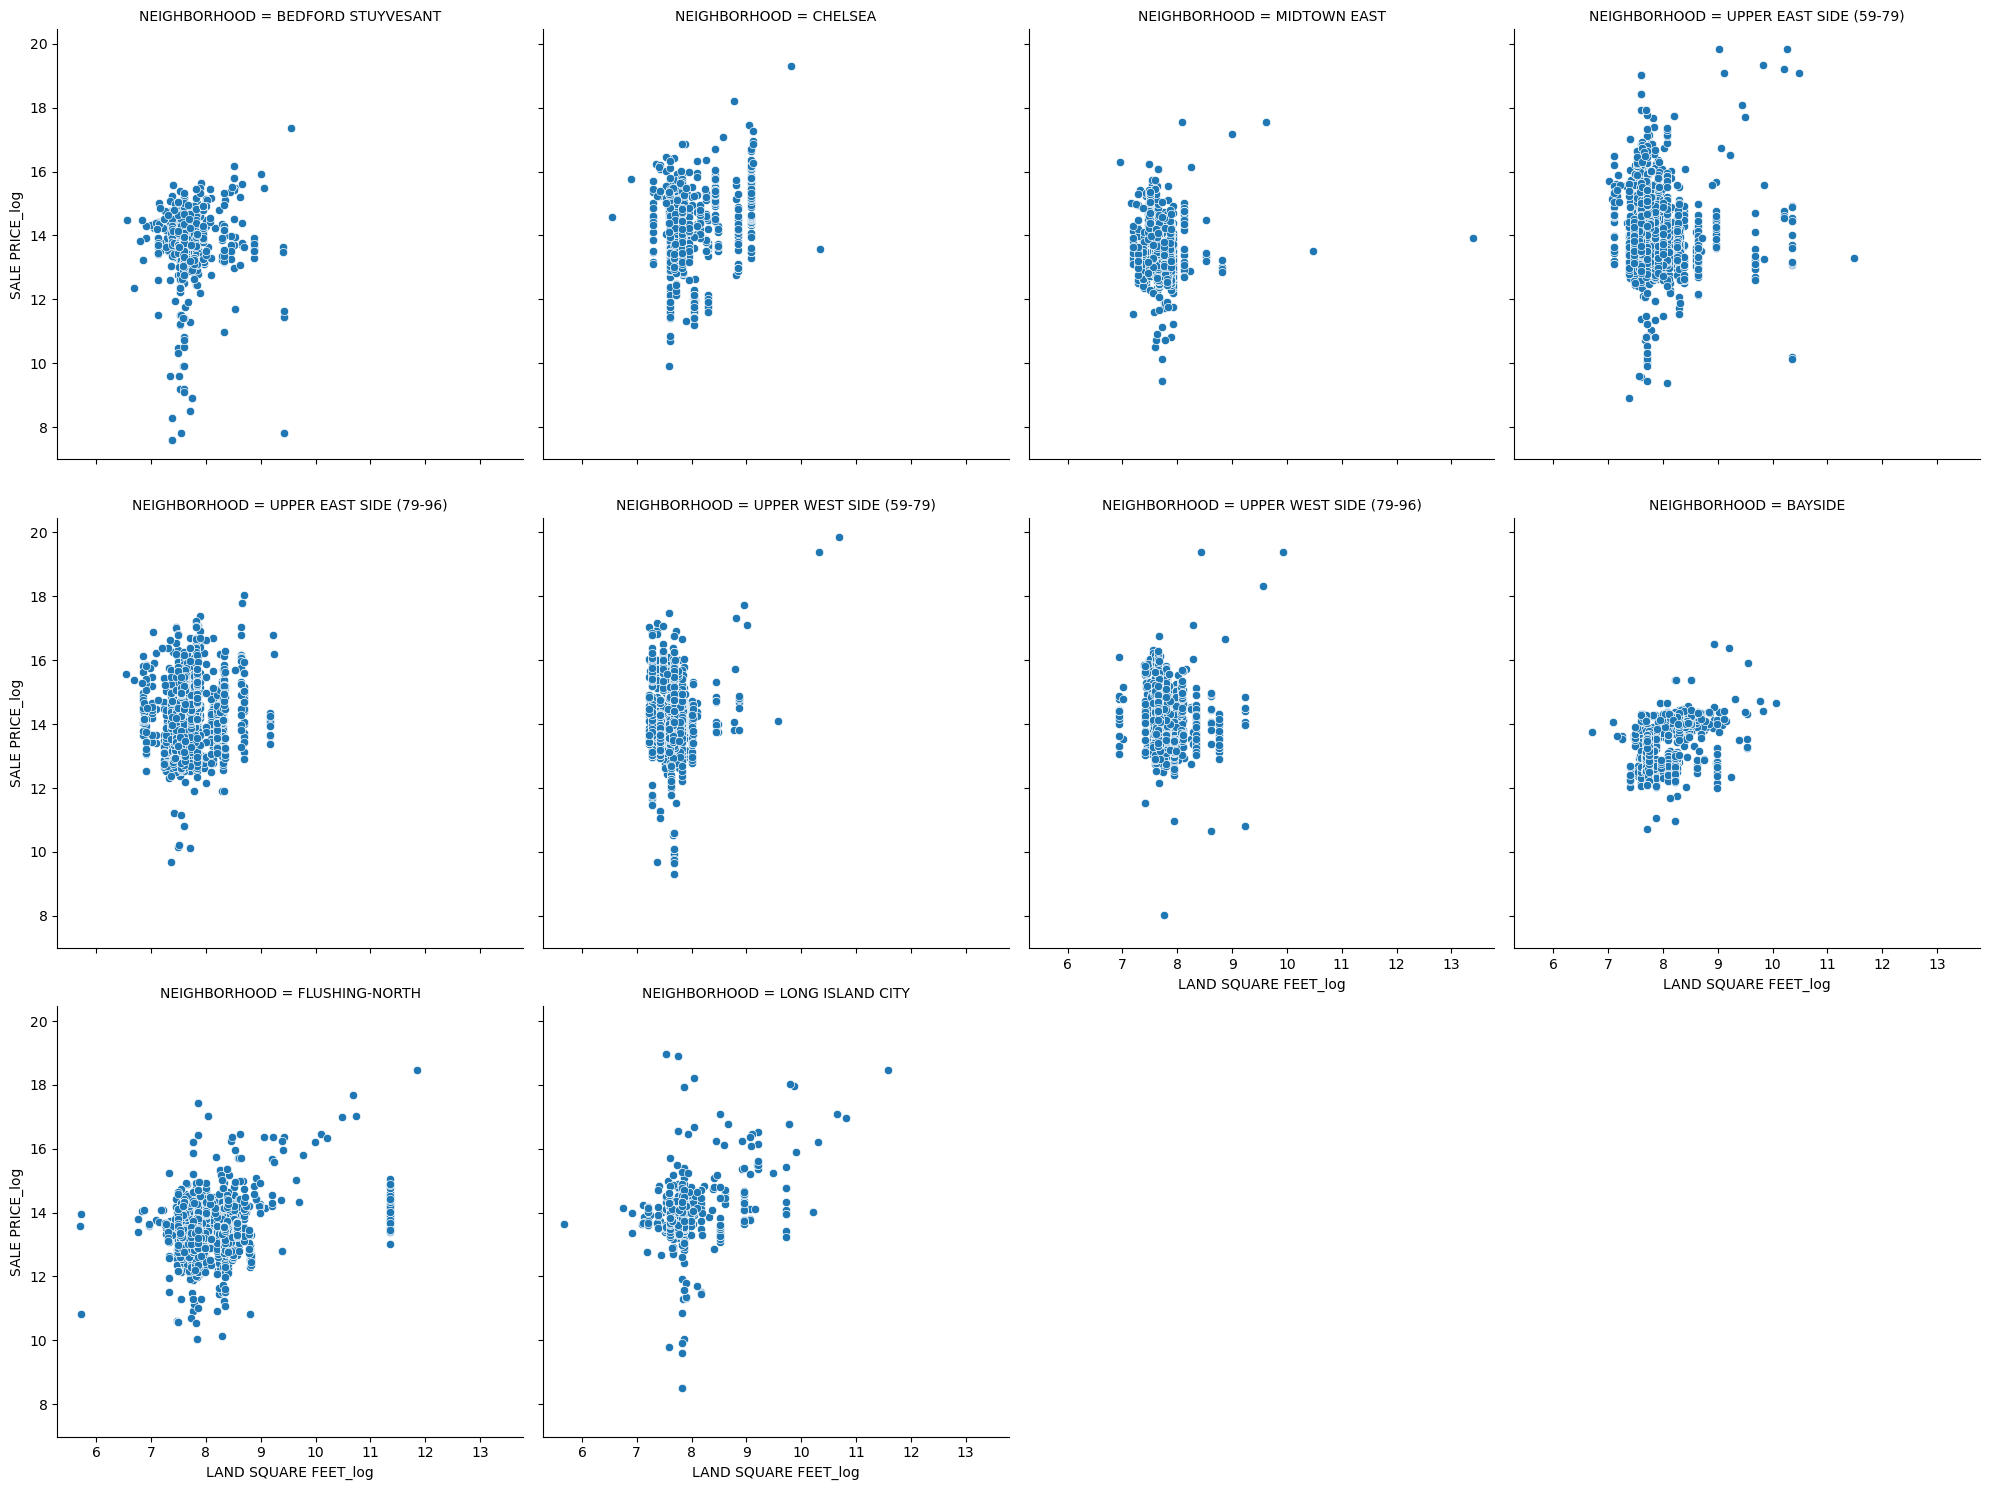

In [187]:
# Create a subset of the data for the top 10 neighborhoods
subset = NYCdata[NYCdata['NEIGHBORHOOD'].isin(top_10_neighborhoods)]

# Create a facet grid with 'LAND SQUARE FEET_log' on the x-axis and 'SALE PRICE_log' on the y-axis
sns.relplot(data=subset, x='LAND SQUARE FEET_log', y='SALE PRICE_log', col='NEIGHBORHOOD', col_wrap=4)
